#### Manipulação e Correção de Tipos de Dados
***

Um dos aspectos fundamentais no processamento de dados é garantir que os tipos de dados estejam corretos e adequados para as operações que serão realizadas. Uma má interpretação dos tipos de dados pode levar a resultados imprecisos ou inconsistentes em análises e modelos de dados.

Uma das principais razões pelas quais a manipulação e correção de tipos de dados é importante é porque diferentes tipos de dados têm comportamentos e propriedades específicas. Por exemplo, os números inteiros são tratados de forma diferente dos números de ponto flutuante, e as datas e horários têm suas próprias peculiaridades de manipulação e cálculo. Ao garantir que os tipos de dados sejam corretamente interpretados, podemos realizar operações matemáticas, filtros e comparações com precisão.

#### Importando as Bibliotecas


In [1]:
import pandas as pd

#### Coletando Dados de Perfil
***

In [6]:
df = pd.read_csv('./datasets/perfil_clientes.csv', sep=';')
df

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
0,39,Servidor Público,Ensino Médio Completo,13,Solteiro,Branco,Masculino,RO,Norte,2.0,"4754,50"
1,50,Autônomo,Superior Incompleto,13,Casado,Branco,Masculino,AC,Norte,1.0,3923
2,38,Funcionário Setor Privado,Ensino Médio Incompleto,9,Divorciado,Branco,Masculino,AM,Norte,0.0,"1100,50"
3,53,Funcionário Setor Privado,Ensino Médio Incompleto,7,Casado,Negro,Masculino,RR,Norte,1.0,1100
4,28,Funcionário Setor Privado,Ensino Médio Completo,13,Casado,Negro,Feminino,PA,Norte,0.0,3430
...,...,...,...,...,...,...,...,...,...,...,...
7994,23,Funcionário Setor Privado,Ensino Médio Completo,10,Casado,Negro,Masculino,AL,Nordeste,3.0,2856
7995,19,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Feminino,SE,Nordeste,1.0,1100
7996,44,NaN,Ensino Médio Completo,10,Casado,Branco,Masculino,BA,Nordeste,0.0,3729
7997,20,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Negro,Masculino,MG,Sudeste,0.0,1100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            7999 non-null   int64  
 1   classe_trabalho  7612 non-null   object 
 2   escolaridade     7999 non-null   object 
 3   anos_estudo      7999 non-null   int64  
 4   estado_civil     7999 non-null   object 
 5   raca             7999 non-null   object 
 6   sexo             7999 non-null   object 
 7   UF               7999 non-null   object 
 8   região           7999 non-null   object 
 9   qtde_filhos      7997 non-null   float64
 10  salario          7999 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 687.5+ KB


In [9]:
df.describe()

,idade,anos_estudo,qtde_filhos
count,7999.000000,7999.000000,7997.000000
mean,38.477060,10.067633,2.404902
std,13.568667,2.537797,1.704059
min,17.000000,1.000000,0.000000
25%,28.000000,9.000000,1.000000
50%,37.000000,10.000000,2.000000
75%,47.000000,12.000000,4.000000
max,90.000000,16.000000,5.000000


#### Entendimento Inicial dos Dados
***
É necessário analisar os dados para entender a estrutura, identificar variáveis, e verificar possíveis problemas.

In [11]:
df['salario'].str.replace(',', '.')

0       4754.50
1          3923
2       1100.50
3          1100
4          3430
         ...   
7994       2856
7995       1100
7996       3729
7997       1100
7998       2579
Name: salario, Length: 7999, dtype: object

In [16]:
df['salario'] = df['salario'].str.replace(',', '.')
df['salario']

0       4754.50
1          3923
2       1100.50
3          1100
4          3430
         ...   
7994       2856
7995       1100
7996       3729
7997       1100
7998       2579
Name: salario, Length: 7999, dtype: object

In [19]:
df['salario'] = df['salario'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            7999 non-null   int64  
 1   classe_trabalho  7612 non-null   object 
 2   escolaridade     7999 non-null   object 
 3   anos_estudo      7999 non-null   int64  
 4   estado_civil     7999 non-null   object 
 5   raca             7999 non-null   object 
 6   sexo             7999 non-null   object 
 7   UF               7999 non-null   object 
 8   região           7999 non-null   object 
 9   qtde_filhos      7997 non-null   float64
 10  salario          7999 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 687.5+ KB


In [20]:

df['qtde_filhos'] = df['qtde_filhos'].astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

#### Corrigindo Tipo de Dados
***
Dados incorretamente tipados podem levar a erros nas análises. É essencial garantir que cada coluna de dados tenha o tipo correto.

#### Eliminação de Dados Duplicados
***
A presença de dados duplicados pode distorcer os resultados de análises e modelos. A eliminação de duplicatas é, portanto, uma etapa crucial.

In [23]:
filtro = df.duplicated()
len(df[filtro])

66

In [24]:
df.duplicated().sum()

np.int64(66)

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

np.int64(0)

#### Correção de Dados Ausentes
***
Dados ausentes podem afetar a integridade das análises. A correção desses dados pode ser feita de várias formas, como preenchimento com valores médios, exclusão de registros ou interpolação.

In [28]:
df.isna().sum()

idade                0
classe_trabalho    387
escolaridade         0
anos_estudo          0
estado_civil         0
raca                 0
sexo                 0
UF                   0
região               0
qtde_filhos          2
salario              0
dtype: int64

In [35]:
filtro = df['qtde_filhos'].isna()
index_dados_ausentes = df[filtro].index
df.loc[index_dados_ausentes]

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
12,23,Funcionário Setor Privado,Pós-Graduado,13,Solteiro,Branco,Feminino,PE,Nordeste,NaN,5316.0
20,40,Funcionário Setor Privado,Doutorado,16,Casado,Branco,Masculino,PR,Sul,NaN,12535.0


#### Correção de Dados Numéricos

<Axes: >

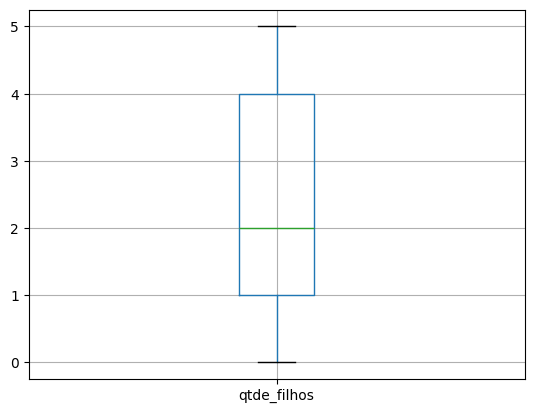

In [41]:
df.boxplot('qtde_filhos')

In [50]:
mediana_qtde_filhos = df['qtde_filhos'].median()
print(mediana_qtde_filhos)

2.0


idade                0
classe_trabalho    387
escolaridade         0
anos_estudo          0
estado_civil         0
raca                 0
sexo                 0
UF                   0
região               0
qtde_filhos          0
salario              0
dtype: int64

In [51]:
df['qtde_filhos'] = df['qtde_filhos'].fillna(value=mediana_qtde_filhos)

C:\Users\Kesley\AppData\Local\Temp\ipykernel_23412\2846002186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['qtde_filhos'] = df['qtde_filhos'].fillna(value=mediana_qtde_filhos)


In [52]:
df.isna().sum()

idade                0
classe_trabalho    387
escolaridade         0
anos_estudo          0
estado_civil         0
raca                 0
sexo                 0
UF                   0
região               0
qtde_filhos          0
salario              0
dtype: int64

#### Correção de Dados Categóricos

In [56]:
df['classe_trabalho'].value_counts()


classe_trabalho
Funcionário Setor Privado    5322
Autônomo                      588
Empresário                    496
Servidor Público              299
MEI                           275
Aposentado                    267
Funcionário Público           216
Menor Aprendiz                 79
Desempregado                    3
Estagiário                      1
Name: count, dtype: int64

In [58]:
moda = df['classe_trabalho'].mode()[0]
print(moda)

Funcionário Setor Privado


In [62]:
filtro = df['classe_trabalho'].isna()
index_ausentes = df[filtro].index
df.loc[index_ausentes]

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
61,32,NaN,Ensino Fundamental Incompleto,4,União Estável,Branco,Masculino,MA,Nordeste,4.0,1100.0
69,25,NaN,Ensino Médio Completo,10,Solteiro,Branco,Masculino,BA,Nordeste,3.0,3450.0
127,35,NaN,Ensino Médio Incompleto,9,Casado,Amarelo,Masculino,PR,Sul,4.0,1100.0
148,43,NaN,Ensino Médio Completo,10,Divorciado,Branco,Feminino,SE,Nordeste,0.0,2490.0
153,52,NaN,Ensino Médio Incompleto,9,Divorciado,Branco,Masculino,SP,Sudeste,1.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...
7931,51,NaN,Ensino Médio Completo,10,Divorciado,Branco,Feminino,PA,Norte,2.0,2660.0
7952,19,NaN,Ensino Médio Completo,10,Solteiro,Branco,Feminino,GO,Centro-Oeste,0.0,2581.0
7960,30,NaN,Ensino Fundamental Completo,5,Solteiro,Branco,Feminino,TO,Norte,4.0,1100.0
7988,20,NaN,Ensino Médio Completo,10,Solteiro,Branco,Masculino,MA,Nordeste,2.0,3610.0
